**PGDSE_EDA_CLASS_27.11.2020**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/drive/MyDrive/PGDSE_STUDY_MATERIAL/PGDSE/EDA/CLASS/k_circle_sales.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.3,OUT018,2009,Medium,Tier 2,Supermarket Type2,443.4228,14.3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.1,OUT010,1998,NaN,NaN,Grocery Store,732.3800,13.6
4,NCD19,8.93,Low Fat,0.000000,Household,53.9,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,14.1


In [3]:
df['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDX20     9
NCI54     9
FDV38     9
         ..
FDQ60     1
FDT35     1
FDE52     1
FDO33     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [4]:
df['Item_Outlet_Sales'].mean()

2181.2889135750365

In [5]:
df[df['Outlet_Identifier']=='OUT049']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8,OUT049,1999,Medium,Tier 2,Supermarket Type1,3735.1380,11.5
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,2097.2700,14.5
10,FDY07,11.800,Low Fat,0.000000,Fruits and Vegetables,45.5,OUT049,1999,Medium,Tier 2,Supermarket Type1,1516.0266,14.3
12,FDX32,15.100,Regular,0.100014,Fruits and Vegetables,145.5,OUT049,1999,Medium,Tier 2,Supermarket Type1,1589.2646,14.6
17,FDP49,9.000,Regular,0.069196,Breakfast,54.4,OUT049,1999,Medium,Tier 2,Supermarket Type1,718.3982,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8451,FDK21,7.905,Low Fat,0.010028,Snack Foods,249.6,OUT049,1999,Medium,Tier 2,Supermarket Type1,3254.4304,13.9
8467,FDV31,9.800,LF,0.000000,Fruits and Vegetables,175.2,OUT049,1999,Medium,Tier 2,Supermarket Type1,3881.6140,12.3
8470,FDW27,5.860,Regular,0.151088,Meat,155.1,OUT049,1999,Medium,Tier 2,Supermarket Type1,1551.3140,12.3
8475,NCS17,18.600,Low Fat,0.080627,Health and Hygiene,92.5,OUT049,1999,Medium,Tier 2,Supermarket Type1,378.1744,14.5


In [6]:
df[df['Outlet_Identifier']=='OUT049']['Item_Outlet_Sales'].mean()

2348.354634623656

In [7]:
df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [8]:
pd.pivot_table(data=df,index='Outlet_Identifier',values='Item_Outlet_Sales')

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


In [9]:
df.var()

Item_Weight                  3.337201e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.876071e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
Profit                       2.896258e+00
dtype: float64

In [10]:
df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].astype('object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7774 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   object 
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       6473 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Profit                     8523 non-null   float64
dtypes: float64(5), object(8)
memory usage: 865.7+ KB

In [12]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year     object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Profit                       float64
dtype: object

In [13]:
df.var()

Item_Weight                  3.337201e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.876071e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
Profit                       2.896258e+00
dtype: float64

In [14]:
df.std()

Item_Weight                     5.776851
Item_Visibility                 0.051598
Item_MRP                       62.258099
Outlet_Establishment_Year       8.371760
Item_Outlet_Sales            1706.499616
Profit                          1.701840
dtype: float64

**PGDSE_EDA_CLASS_28.11.2020**

In [15]:
df.skew()

Item_Weight                 -0.352215
Item_Visibility              1.167091
Item_MRP                     0.127390
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Profit                      -3.379808
dtype: float64

In [16]:
df['Item_Outlet_Sales'].value_counts().index[0]

958.752

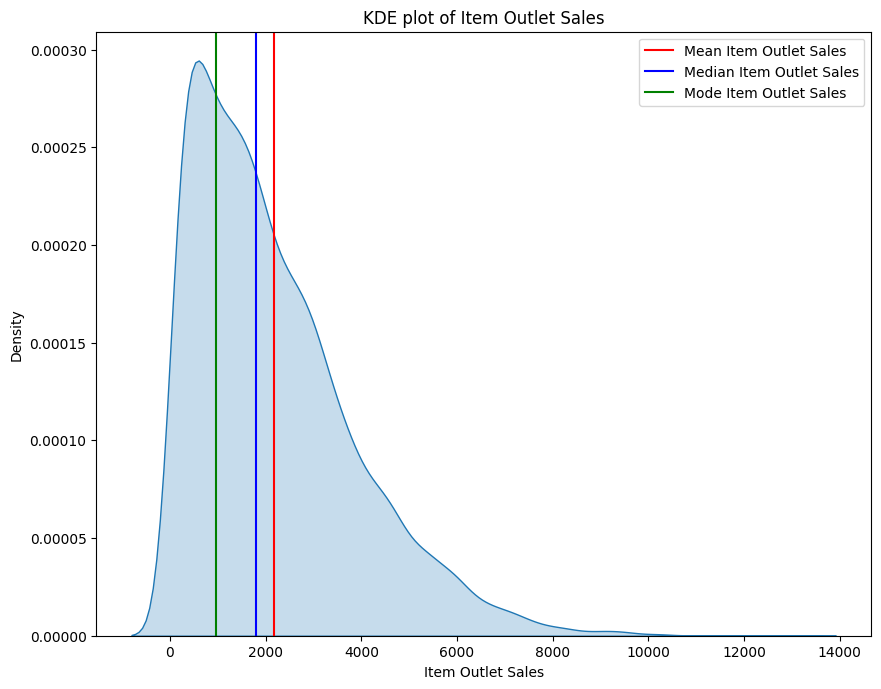

In [17]:
plt.figure(figsize=(10,8),dpi=100)
sns.kdeplot(df['Item_Outlet_Sales'],shade=True)
plt.xlabel("Item Outlet Sales")
plt.ylabel("Density")
plt.title("KDE plot of Item Outlet Sales")
plt.axvline(x=df['Item_Outlet_Sales'].mean(),color='red',label='Mean Item Outlet Sales')
plt.axvline(x=df['Item_Outlet_Sales'].median(),color='blue',label='Median Item Outlet Sales')
plt.axvline(x=df['Item_Outlet_Sales'].value_counts().index[0],color='green',label='Mode Item Outlet Sales')
plt.legend()
plt.show()

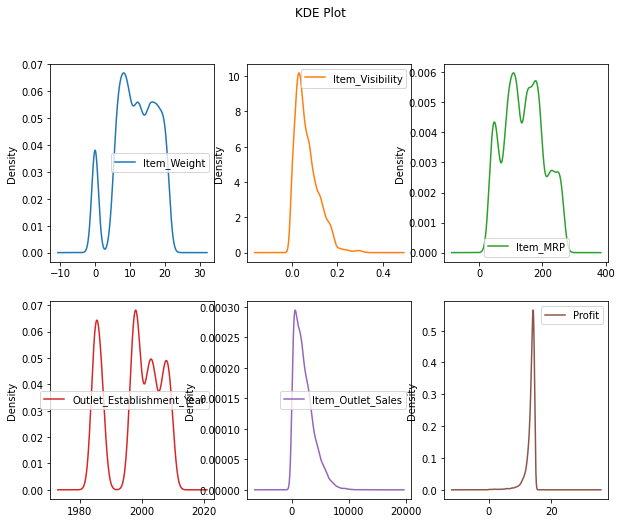

In [18]:
df.plot(kind='kde',subplots=True,layout=(2,3),sharex=False,sharey=False,figsize=(10,8),title="KDE Plot",fontsize=10)
plt.show()

In [19]:
df.cov()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,33.372008,-0.016030,7.425851,-3.295708e+02,-0.160196
Item_Visibility,-0.016030,0.002662,-0.005131,-1.132561e+01,0.001253
Item_MRP,7.425851,-0.005131,3876.070885,6.029901e+04,0.435364
Item_Outlet_Sales,-329.570782,-11.325611,60299.006078,2.912141e+06,2.762921
Profit,-0.160196,0.001253,0.435364,2.762921e+00,2.896258


In [20]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
Item_Weight,1.000000,-0.055081,0.020616,-0.034997,-0.016058
Item_Visibility,-0.055081,1.000000,-0.001597,-0.128625,0.014269
Item_MRP,0.020616,-0.001597,1.000000,0.567555,0.004109
Item_Outlet_Sales,-0.034997,-0.128625,0.567555,1.000000,0.000951
Profit,-0.016058,0.014269,0.004109,0.000951,1.000000


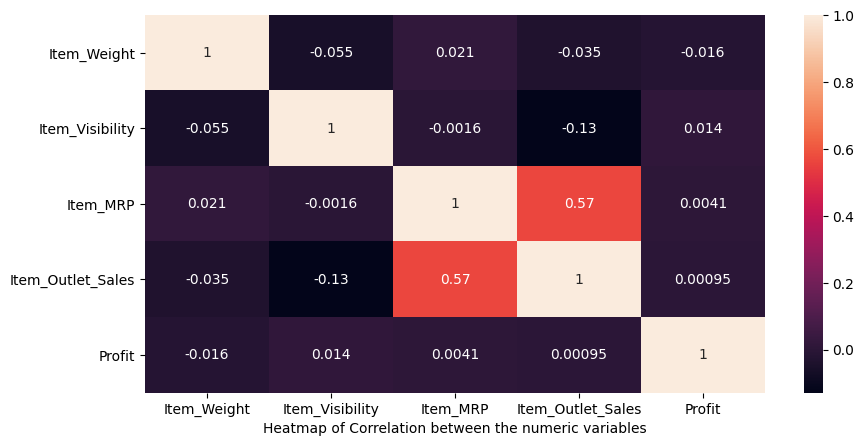

In [21]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(data=df.corr(),annot=True)
plt.xlabel("Heatmap of Correlation between the numeric variables")
plt.show()

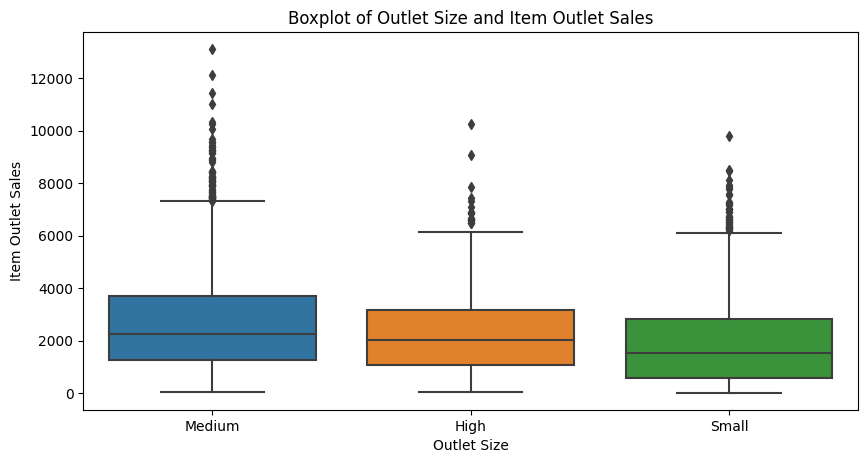

In [22]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['Outlet_Size'],y=df['Item_Outlet_Sales'])
plt.title("Boxplot of Outlet Size and Item Outlet Sales")
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.show()

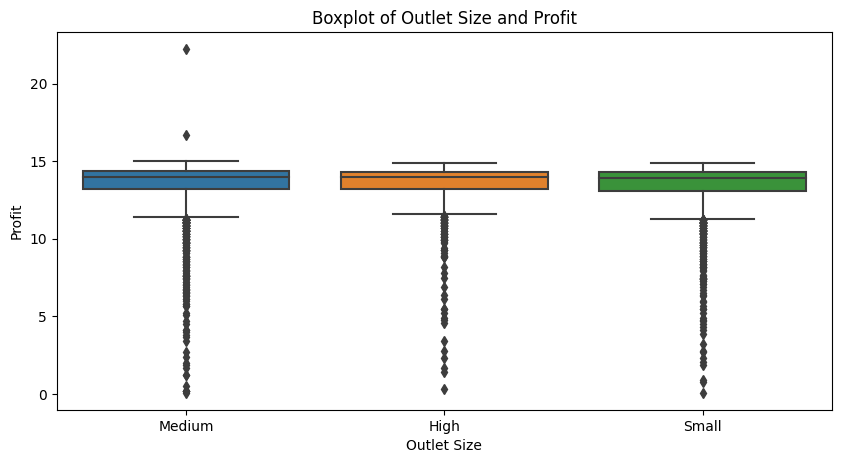

In [23]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['Outlet_Size'],y=df['Profit'])
plt.title("Boxplot of Outlet Size and Profit")
plt.xlabel("Outlet Size")
plt.ylabel("Profit")
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


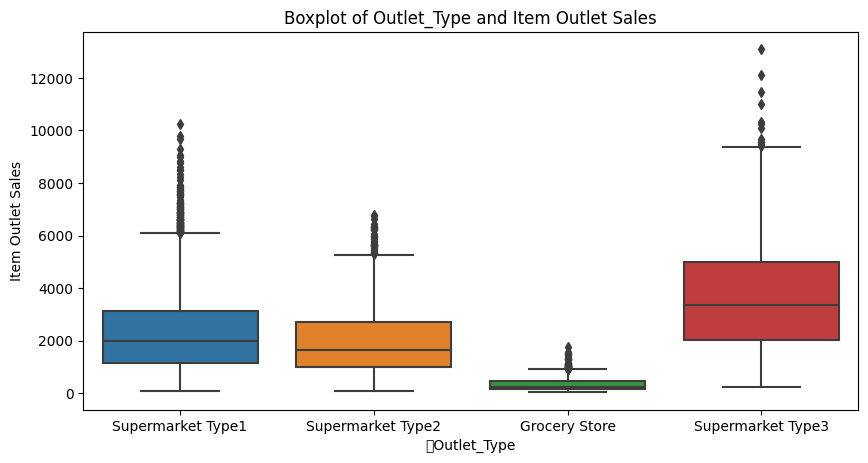

In [24]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x=df['Outlet_Type'],y=df['Item_Outlet_Sales'])
plt.title("Boxplot of Outlet_Type and Item Outlet Sales")
plt.xlabel("	Outlet_Type")
plt.ylabel("Item Outlet Sales")
plt.show()

**PGDSE_EDA_CLASS_02.12.2020**

In [25]:
df.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                   8.787985
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

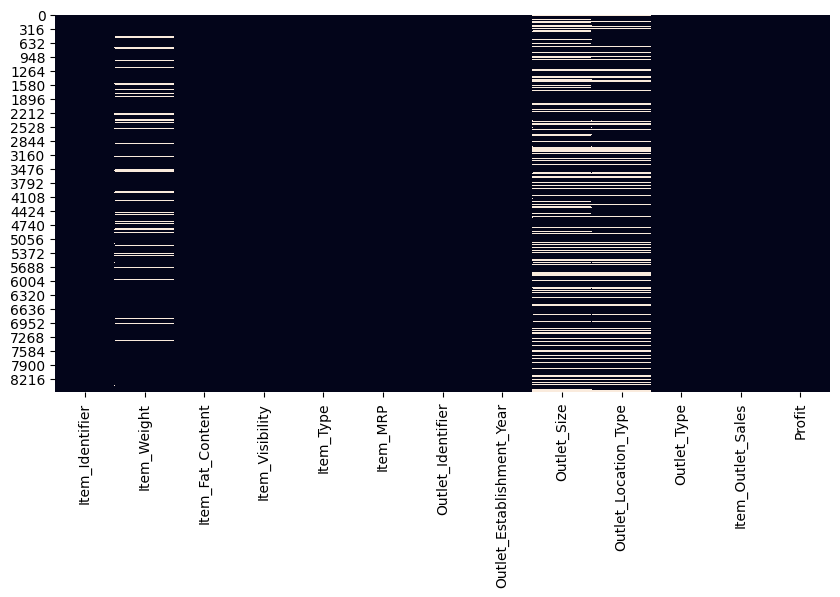

In [27]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [28]:
df['Item_Weight'].describe()

count    7774.000000
mean       11.676740
std         5.776851
min         0.000000
25%         7.720000
50%        11.800000
75%        16.500000
max        21.350000
Name: Item_Weight, dtype: float64

In [29]:
df['Item_Weight'].replace(0,np.nan,inplace=True)

In [30]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [31]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

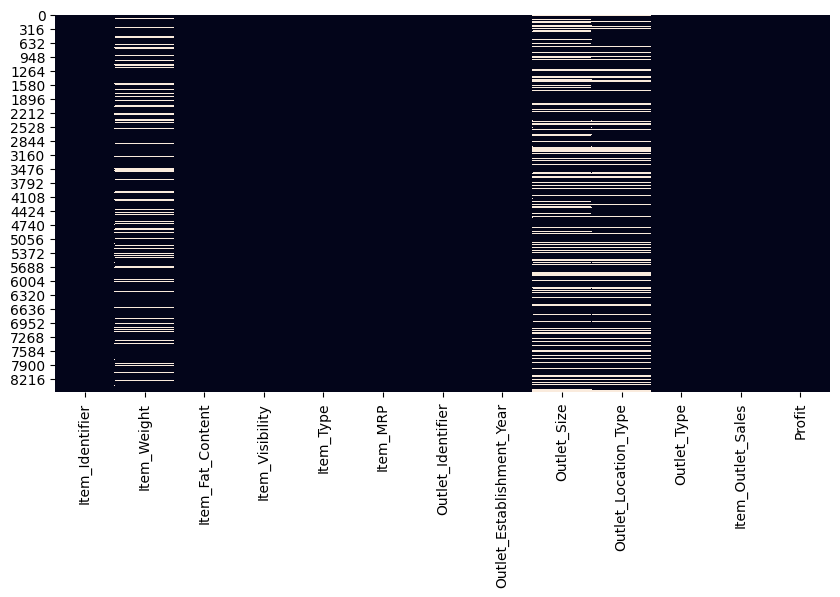

In [32]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df.isnull(),cbar=False)
plt.show()

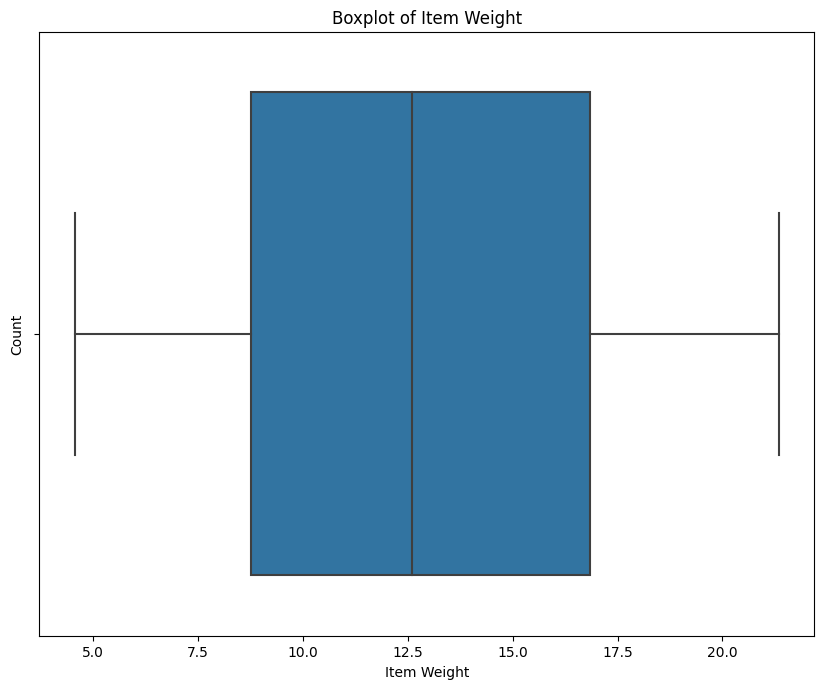

In [33]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(x=df['Item_Weight'])
plt.xlabel("Item Weight")
plt.ylabel("Count")
plt.title('Boxplot of Item Weight')
plt.show()

In [34]:
df['Item_Weight'].fillna(df['Item_Weight'].mean())

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [35]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [36]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type         24.052564
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Profit                        0.000000
dtype: float64

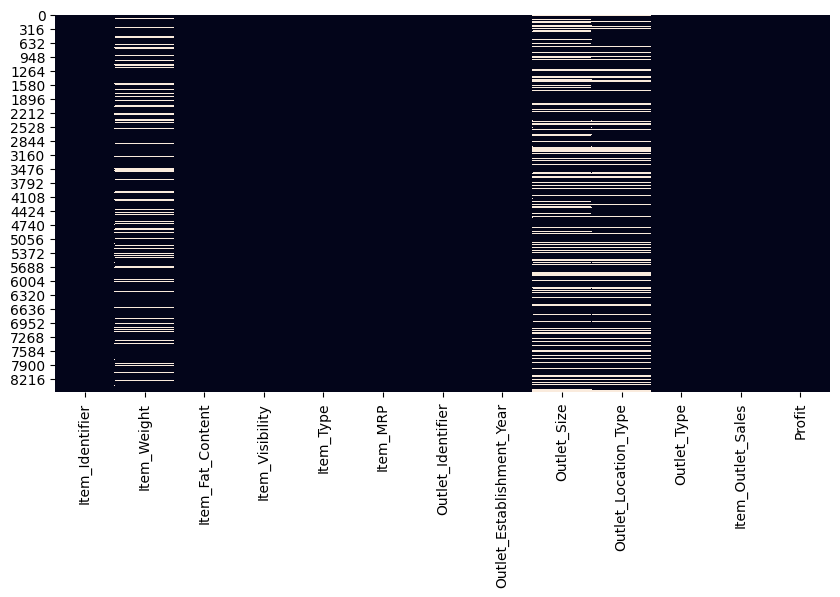

In [37]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(df.isnull(),cbar=False)
plt.show()

In [38]:
df['Item_Weight']=df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean'))

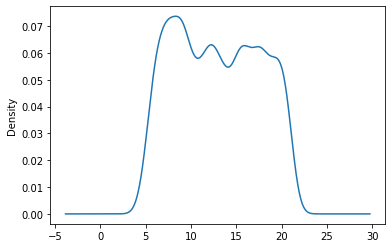

In [39]:
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean')).plot(kind='kde')

In [40]:
df['Item_Weight'].fillna(df.groupby('Item_Identifier')['Item_Weight'].transform('mean')).isnull().sum()

4

In [41]:
df['Item_Weight'].fillna(df['Item_Weight'].mean())

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [42]:
df['Item_Weight'].fillna(df['Item_Weight'].mean())

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [43]:
df['Item_Weight'].isnull().sum()

4

In [44]:
df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [45]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [46]:
df['Outlet_Size'].value_counts(normalize=True)*100

Medium    45.689514
Small     39.064289
High      15.246197
Name: Outlet_Size, dtype: float64

In [47]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [48]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [49]:
df['Outlet_Size'].value_counts(normalize=True)*100

Medium    45.689514
Small     39.064289
High      15.246197
Name: Outlet_Size, dtype: float64

In [50]:
ind=df[df['Outlet_Size'].isnull()].index
ind

Int64Index([   3,    8,    9,   25,   28,   30,   33,   45,   46,   47,
            ...
            8493, 8494, 8496, 8500, 8501, 8502, 8508, 8509, 8514, 8519],
           dtype='int64', length=2410)

In [51]:
for i in ind:
    if df.loc[i,'Item_Outlet_Sales']<2100:
        df.loc[i,'Outlet_Size']='Small'
    elif df.loc[i,'Item_Outlet_Sales']>2600:
        df.loc[i,'Outlet_Size']='Medium'
    else:
        df.loc[i,'Outlet_Size']='High'

In [52]:
df['Outlet_Size'].value_counts()

Small     3947
Medium    3429
High      1147
Name: Outlet_Size, dtype: int64

In [53]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type         2050
Outlet_Type                     0
Item_Outlet_Sales               0
Profit                          0
dtype: int64

In [54]:
df['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
?          120
  --       109
  -         67
na          48
NAN         16
Name: Outlet_Location_Type, dtype: int64

In [55]:
df['Outlet_Location_Type'].unique()

array(['Tier 2', nan, 'Tier 3', '  --', 'Tier1', 'na', '  -', '?', 'NAN'],
      dtype=object)

In [56]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].replace({'  --':np.nan,'na':np.nan,'  -':np.nan,'?':np.nan,'NAN':np.nan})

In [57]:
df['Outlet_Location_Type'].value_counts()

Tier 2    2793
Tier1     2388
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [58]:
df=df.drop(['Outlet_Location_Type'],1)

In [59]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Type                  0
Item_Outlet_Sales            0
Profit                       0
dtype: int64

**PGDSE_EDA_CLASS_04.12.2020**

In [60]:
df_num=df.select_dtypes(exclude='object')
df_num

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,9.300,0.016047,249.8,3735.1380,11.5
1,5.920,0.019278,48.3,443.4228,14.3
2,17.500,0.016760,141.6,2097.2700,14.5
3,19.200,0.000000,182.1,732.3800,13.6
4,8.930,0.000000,53.9,994.7052,14.1
...,...,...,...,...,...
8518,6.865,0.056783,214.5,2778.3834,14.1
8519,8.380,0.046982,108.2,549.2850,14.2
8520,10.600,0.035186,85.1,1193.1136,9.5
8521,7.210,0.145221,103.1,1845.5976,14.2


In [61]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_num_T=sc.fit_transform(df_num)

In [62]:
df_num_T

array([[-0.76959845, -0.97073217,  1.74768499,  0.910601  , -1.12503308],
       [-1.49713327, -0.90811123, -1.48903161, -1.01844035,  0.52034176],
       [ 0.99542688, -0.95691733,  0.00965652, -0.04923754,  0.63786854],
       ...,
       [-0.48977736, -0.59978449, -0.89790917, -0.57909963, -2.30030082],
       [-1.21946466,  1.53287976, -0.6087732 , -0.19672492,  0.46157837],
       [ 0.41426   , -0.41193591, -1.05211502, -0.82959407,  0.69663192]])

In [63]:
df_num_T=pd.DataFrame(df_num_T,columns=df_num.columns)
df_num_T

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,-0.769598,-0.970732,1.747685,0.910601,-1.125033
1,-1.497133,-0.908111,-1.489032,-1.018440,0.520342
2,0.995427,-0.956917,0.009657,-0.049238,0.637869
3,1.361347,-1.281758,0.660212,-0.849103,0.108998
4,-0.849240,-1.281758,-1.399078,-0.695373,0.402815
...,...,...,...,...,...
8518,-1.293725,-0.181193,1.180657,0.349915,0.402815
8519,-0.967626,-0.371154,-0.526851,-0.956402,0.461578
8520,-0.489777,-0.599784,-0.897909,-0.579100,-2.300301
8521,-1.219465,1.532880,-0.608773,-0.196725,0.461578


In [64]:
df_num_T.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
count,8.519000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,2.414171e-16,1.822365e-16,3.475390e-17,1.638435e-16,-3.920886e-18
std,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00
min,-1.790945e+00,-1.281758e+00,-1.762104e+00,-1.258790e+00,-7.824059e+00
25%,-8.804506e-01,-7.586531e-01,-7.581601e-01,-7.894057e-01,-1.554372e-01
50%,-4.852103e-02,-2.364792e-01,2.732594e-02,-2.267687e-01,2.852882e-01
75%,8.555163e-01,5.514755e-01,7.172365e-01,5.391513e-01,5.203418e-01
max,1.824128e+00,5.083050e+00,2.022364e+00,6.391045e+00,6.220390e+00


In [65]:
samp=pd.concat([df_num['Item_Outlet_Sales'],df_num_T['Item_Outlet_Sales']],axis=1,join='outer')
samp

,Item_Outlet_Sales,Item_Outlet_Sales
0,3735.1380,0.910601
1,443.4228,-1.018440
2,2097.2700,-0.049238
3,732.3800,-0.849103
4,994.7052,-0.695373
...,...,...
8518,2778.3834,0.349915
8519,549.2850,-0.956402
8520,1193.1136,-0.579100
8521,1845.5976,-0.196725


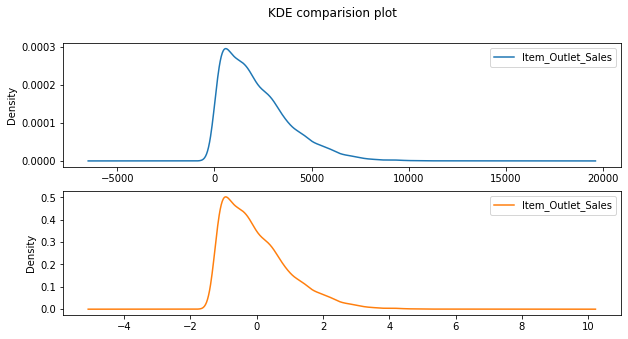

In [66]:
samp.plot(kind='kde',subplots=True, sharex=False,figsize=(10,5),title='KDE comparision plot',legend=True,layout=(2,1))
plt.show()

In [67]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
df_num_T2=mm.fit_transform(df_num)
df_num_T2=pd.DataFrame(df_num_T2,columns=df_num.columns)
df_num_T2

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit
0,0.282525,0.048866,0.927419,0.283587,0.476987
1,0.081274,0.058705,0.072156,0.031419,0.594142
2,0.770765,0.051037,0.468166,0.158115,0.602510
3,0.871986,0.000000,0.640068,0.053555,0.564854
4,0.260494,0.000000,0.095925,0.073651,0.585774
...,...,...,...,...,...
8518,0.137541,0.172914,0.777589,0.210293,0.585774
8519,0.227746,0.143069,0.326401,0.039529,0.589958
8520,0.359929,0.107148,0.228353,0.088850,0.393305
8521,0.158083,0.442219,0.304754,0.138835,0.589958


In [68]:
samp2=pd.concat([df_num['Item_Outlet_Sales'],df_num_T2['Item_Outlet_Sales']],axis=1,join='outer')
samp2

,Item_Outlet_Sales,Item_Outlet_Sales
0,3735.1380,0.283587
1,443.4228,0.031419
2,2097.2700,0.158115
3,732.3800,0.053555
4,994.7052,0.073651
...,...,...
8518,2778.3834,0.210293
8519,549.2850,0.039529
8520,1193.1136,0.088850
8521,1845.5976,0.138835


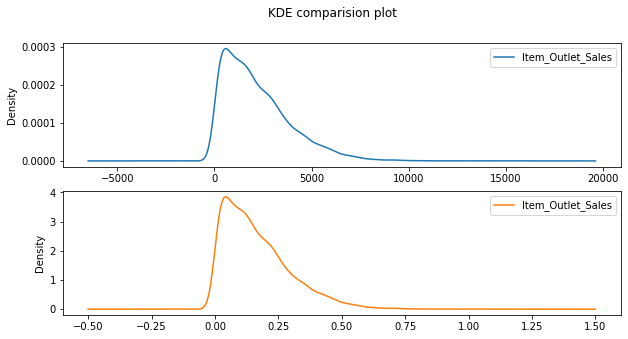

In [69]:
samp2.plot(kind='kde',subplots=True, sharex=False,figsize=(10,5),title='KDE comparision plot',legend=True,layout=(2,1))
plt.show()

      Item_Outlet_Sales  Item_Outlet_Sales
0              0.856094          3735.1380
1             -0.595888           443.4228
2              0.133627          2097.2700
3             -0.468429           732.3800
4             -0.352717           994.7052
...                 ...                ...
8518           0.434068          2778.3834
8519          -0.549192           549.2850
8520          -0.265198          1193.1136
8521           0.022614          1845.5976
8522          -0.453744           765.6700

[8523 rows x 2 columns]


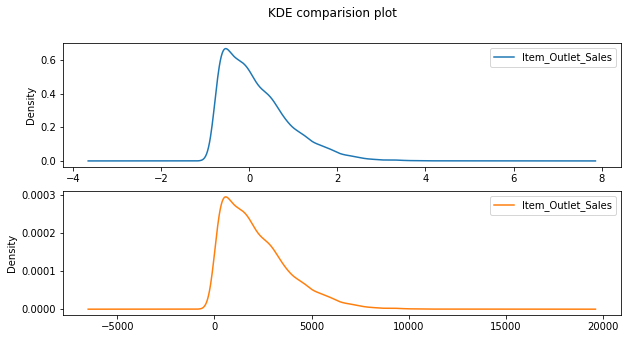

In [70]:
from sklearn.preprocessing import RobustScaler
rs=RobustScaler()
df_num_T3=rs.fit_transform(df_num)
df_num_T3=pd.DataFrame(df_num_T3,columns=df_num.columns)
sample3=pd.concat([df_num_T3['Item_Outlet_Sales'],df_num['Item_Outlet_Sales']],axis=1,join='outer')
print(sample3)
sample3.plot(kind='kde',subplots=True, sharex=False,figsize=(10,5),title='KDE comparision plot',legend=True,layout=(2,1))
plt.show()

In [71]:
df_cat=df.select_dtypes(include='object')
df_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,Medium,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,Medium,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,Medium,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,Small,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,High,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,1987,High,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,2002,Small,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,2004,Small,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,2009,Medium,Supermarket Type2


In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df_cat['Outlet_Size'])

array([1, 1, 1, ..., 2, 1, 2])

In [73]:
df_cat['Outlet_Size']=df_cat['Outlet_Size'].replace({'Small':0,"Medium":1,'High':2})
df_cat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,1999,1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,2009,1,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,1999,1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,1998,0,Grocery Store
4,NCD19,Low Fat,Household,OUT013,1987,2,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,1987,2,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,2002,0,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,2004,0,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,2009,1,Supermarket Type2


In [74]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df_cat['Item_Fat_Content'])

array([1, 2, 1, ..., 1, 2, 1])

In [75]:
df_cat['Item_Fat_Content']=df_cat['Item_Fat_Content'].replace({'Low Fat':0,'low fat':0,'LF':0,'Regular':1,'reg':1})
df_cat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type
0,FDA15,0,Dairy,OUT049,1999,1,Supermarket Type1
1,DRC01,1,Soft Drinks,OUT018,2009,1,Supermarket Type2
2,FDN15,0,Meat,OUT049,1999,1,Supermarket Type1
3,FDX07,1,Fruits and Vegetables,OUT010,1998,0,Grocery Store
4,NCD19,0,Household,OUT013,1987,2,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,0,Snack Foods,OUT013,1987,2,Supermarket Type1
8519,FDS36,1,Baking Goods,OUT045,2002,0,Supermarket Type1
8520,NCJ29,0,Health and Hygiene,OUT035,2004,0,Supermarket Type1
8521,FDN46,1,Snack Foods,OUT018,2009,1,Supermarket Type2


In [76]:
df_cat=pd.get_dummies(data=df_cat,drop_first=True,columns=['Outlet_Establishment_Year','Outlet_Type'])
df_cat.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,0,Dairy,OUT049,1,0,0,0,1,0,0,0,0,1,0,0
1,DRC01,1,Soft Drinks,OUT018,1,0,0,0,0,0,0,0,1,0,1,0


In [77]:
df_cat['Item_Identifier']=df.groupby('Item_Identifier')['Item_Outlet_Sales'].transform('mean')
df_cat.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,5198.06705,0,Dairy,OUT049,1,0,0,0,1,0,0,0,0,1,0,0
1,862.21100,1,Soft Drinks,OUT018,1,0,0,0,0,0,0,0,1,0,1,0


In [78]:
Fenc=df_cat['Item_Type'].value_counts(normalize=True)*100
Fenc.head

<bound method NDFrame.head of Fruits and Vegetables    14.455004
Snack Foods              14.079549
Household                10.676992
Frozen Foods             10.043412
Dairy                     8.001877
Canned                    7.614690
Baking Goods              7.602957
Health and Hygiene        6.101138
Soft Drinks               5.221166
Meat                      4.986507
Breads                    2.944972
Hard Drinks               2.510853
Others                    1.982870
Starchy Foods             1.736478
Breakfast                 1.290625
Seafood                   0.750909
Name: Item_Type, dtype: float64>

In [79]:
df_cat['Item_Type'] = df_cat['Item_Type'].map(Fenc)

In [80]:
df_cat.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,5198.06705,0,8.001877,OUT049,1,0,0,0,1,0,0,0,0,1,0,0
1,862.21100,1,5.221166,OUT018,1,0,0,0,0,0,0,0,1,0,1,0


In [81]:
df2=pd.concat([df_num,df_cat],axis=1,join='outer')
df2.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Profit,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8,3735.1380,11.5,5198.06705,0,8.001877,OUT049,1,0,0,0,1,0,0,0,0,1,0,0
1,5.92,0.019278,48.3,443.4228,14.3,862.21100,1,5.221166,OUT018,1,0,0,0,0,0,0,0,1,0,1,0
